# Regular Expression 
* A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.

### Import necessary modules

In [1]:
import re
import pandas as pd

### Load CSV file to Pandas DataFrame

In [2]:
dataset = pd.read_csv('hacker_news.csv')

In [3]:
dataset.head(3)

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01


### Search string with the help of slicing

In [4]:
'I am Noman and I am a student'[5:10]

'Noman'

### Search string with the help of search() Function
* It searches the string for a match, and returns a Match object if there is a match.
* If there is more than one match, only the first occurrence of the match will be returned.
* Syntax: re.search(pattern, string, flags=0)
    * pattern: It is the regular expression to be matched.
    * string: This is the string, which would be searched to match the pattern anywhere in the string.
    * flags: you can specify different flags using bitwise OR (|).

In [5]:
re.search('Noman','I am Noman and I am a student')

<re.Match object; span=(5, 10), match='Noman'>

In [6]:
if re.search('Noman','I am Noman and I am a student'):
    print('Noman')

Noman


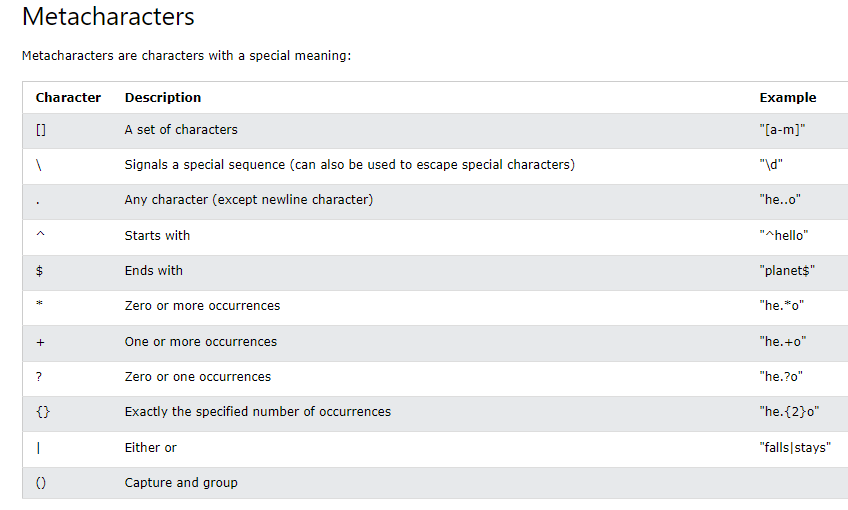

## Search string in 'title' column 

In [7]:
dataset[['title']].head()

,title
0,Interactive Dynamic Video
1,Florida DJs May Face Felony for April Fools' W...
2,Technology ventures: From Idea to Enterprise
3,Note by Note: The Making of Steinway L1037 (2007)
4,Title II kills investment? Comcast and other I...


In [8]:
#string to search: 'Python', 'python'
title = dataset['title']
pattern = '[Pp]ython'

for i in title:
    if re.search(pattern, i):
        print(i)
#not a dynamic way

From Python to Lua: Why We Switched
Ubuntu 16.04 LTS to Ship Without Python 2
Create a GUI Application Using Qt and Python in Minutes
How I Solved GCHQ's Xmas Card with Python and Pycosat. (Explanation and Source)
Unikernel Power Comes to Java, Node.js, Go, and Python Apps
Developing a computational pipeline using the asyncio module in Python 3
Show HN: Minimal, modern embedded V8 for Python
Python integration for the Duktape Javascript interpreter
Python 3 on Google App Engine flexible environment now in beta
IronPython 3 (python for .net) development restarted
Cysignals: signal handling (SIGINT, SIGSEGV, ) for calling C from Python
Ask HN: Would you be interested in an embeddable, lightweight subset of Python?
A Hello World Server in Python
Microsoft shipped Python code in 1996
Moore Foundation provides grant for Contiuum's Python Numba and Dask Compilers
Integrate Python and .NET
Face Swap (C++ / Python): Meet Ted Trump, Donald Clinton and Hillary Cruz
ImportPython
Show HN: Fabulous

### Get string with the help of contain() Function
* 

In [9]:
#string that contains: 'Python', 'python'
title = dataset['title']
pattern = '[Pp]ython'
title[title.str.contains(pattern)].head()

102                  From Python to Lua: Why We Switched
103            Ubuntu 16.04 LTS to Ship Without Python 2
144    Create a GUI Application Using Qt and Python i...
196    How I Solved GCHQ's Xmas Card with Python and ...
436    Unikernel Power Comes to Java, Node.js, Go, an...
Name: title, dtype: object

In [10]:
#string that contains: '1000' to '2999'
pattern = '[1-2][0-9][0-9][0-9]'
title[title.str.contains(pattern)].head()

3     Note by Note: The Making of Steinway L1037 (2007)
34                     The reverse job applicant (2010)
50      Ask HN: Which framework for a CRUD app in 2016?
59         2015 in review  1 year after I quit blogging
80    Apple Watch Scooped Up Over Half the Smartwatc...
Name: title, dtype: object

### Numeric Quantifier
* a{3} -> The character `a` three times
* a{3,5} ->The character `a` three, four or five times
* a{,3} ->The character `a` zero, one, two or three times
* a{8,} ->The character `a` eight or more times

In [11]:
#string that contains '1000' to '2999' using quantifier 
pattern = '[1-2][0-9]{3}'
title[title.str.contains(pattern)].head()

3     Note by Note: The Making of Steinway L1037 (2007)
34                     The reverse job applicant (2010)
50      Ask HN: Which framework for a CRUD app in 2016?
59         2015 in review  1 year after I quit blogging
80    Apple Watch Scooped Up Over Half the Smartwatc...
Name: title, dtype: object

### Single Characters Quantifier
* a* -> equivalent to a{0,} zero or more
* a+ -> equivalent to a{1,} one or more
* a? -> equivalent to a{0,1} zero or one

In [12]:
#using quantifier 'email', 'e-mail' using single character quantifier
pattern = 'e-?mail'
title[title.str.contains(pattern)].head()

119     Show HN: Send an email from your shell to your...
313         Disposable emails for safe spam free shopping
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
2421                   Ashley Madison hack treating email
Name: title, dtype: object

In [13]:
#string that contains: email, Email, EMAIL, EmAiL or EMail
pattern = r'[Ee][Mm][Aa][Ii][Ll]'
dataset['title'][dataset['title'].str.contains(pattern)]

119      Show HN: Send an email from your shell to your...
161      Computer Specialist Who Deleted Clinton Emails...
174                                        Email Apps Suck
261      Emails Show Unqualified Clinton Foundation Don...
313          Disposable emails for safe spam free shopping
                               ...                        
18847    Show HN: Crisp iOS keyboard for email and text...
19303    Ask HN: Why big email providers don't sign the...
19395    I used HTML Email when applying for jobs, here...
19446    Tell HN: Secure email provider Riseup will run...
19905    Gmail Will Soon Warn Users When Emails Arrive ...
Name: title, Length: 136, dtype: object

In [14]:
#count strings that contains: mysql, postgresql, cloudSQL 
pattern = '\w+sql'
dataset['title'].str.contains(pattern, flags= re.I).sum()

60

### Extract string with the help of extract() Function
* extract() function is used to extract capture groups in the regular expression pattern as columns in a DataFrame. 
* For each subject string in the Series, extract groups from the first match of regular expression pattern.

In [15]:
##extract and count the strings email, e-mail    
pattern = '(e-?mail)'
title.str.extract(pattern).value_counts()

email     81
e-mail     5
dtype: int64

In [16]:
##extract and count the strings mail
pattern = 'e-?(mail)'
dataset['title'].str.extract(pattern).value_counts()

mail    86
dtype: int64

### Character classes
* `set` ->[fud] either f,u or d
* `range` -> [a-e] any of the charachter a,b,c,d or e
* `range` -> [0-3] any of the charachter 0,1,2 or 3
* `range` -> [A-Z] any uppercase letter
* `set+range` -> [A-Za-z] any uppercase or lower case letter[Aa-Zz]
* `Digit` -> **`\d`** any digit character(equivalent to [0-9])
* `Word` -> **`\w`** any digit, uppercase, lowercase or underscore character (equivalent to [A-Za-z0-9_]). Does not include any special character 
* `Whitepace` -> **`\s`** any space, tab or linebreak character
* `Dot` -> **`.`**  any character or special character except newline

In [17]:
#extract and count string using character class : [string] i.e any character within square brackets
pattern = '(\[.+\])'
title.str.extract(pattern).value_counts()

[pdf]                276
[video]              111
[2015]                 3
[audio]                3
[beta]                 2
                    ... 
[Map]                  1
[Live]                 1
[Ksummit-Discuss]      1
[JavaScript]           1
[viz]                  1
Length: 79, dtype: int64

### sub() function 
* It belongs to the Regular Expressions module in Python. 
* It returns a string where all matching occurrences of the specified pattern are replaced by the replace string.

In [18]:
name = 'Ali Khan'
re.sub('\s+','_',name)

'Ali_Khan'

### Negative Class
* `Negative Set` -> [^fud] any charachter except f,u or d
* `Negative Set` -> [^1-3Z\s] any charachter except 1,2,3,Z or Whitespace character
* `Negative Digit` -> \D any charachter except Digit character
* `Negative Word` -> \W any charachter except word character
* `Negative whitespace` -> \S any charachter except space character

* ^ -> it will check pattern at the start
* $ -> it will check pattern at the end

In [19]:
# 1000.0, 5000.00, 1000, 6000
pattern = '\d+0{3}\.?0*$'
re.search(pattern,'1000000')

<re.Match object; span=(0, 7), match='1000000'>

In [20]:
#i = 'C Language'
pattern = r'(?<!Series)\s\b[Cc]\b(?![\.\+#])'
dataset['title'][dataset['title'].str.contains(pattern, flags= re.I)]

365                       The new C standards are worth it
521           Fuchsia: Micro kernel written in C by Google
1307             Show HN: Yupp, yet another C preprocessor
1326                      The C standard formalized in Coq
1365                           GNU C Library 2.23 released
                               ...                        
18480                                             Fixing C
18549            Show HN: An awesome C library for Windows
18649                 Python vs. C/C++ in embedded systems
19151                      Ask HN: How to learn C in 2016?
19933    Lightweight C library to parse NMEA 0183 sente...
Name: title, Length: 65, dtype: object

### Regular Expression for duplicate strings

In [21]:
# 'Hammad Hammad'
# 'Tuk Tuk'
pattern = r'\b(\w+)\s\1\b'
re.search(pattern,'Tuk Tuk')

<re.Match object; span=(0, 7), match='Tuk Tuk'>

In [22]:
i = 'problem ok ok problem'
pattern = r'\b(\w+)\s(\w+)\s\2\s\1\b'
re.search(pattern,i)

<re.Match object; span=(0, 21), match='problem ok ok problem'>

In [23]:
#e mail, e-mail, email

pattern = '(e[\s-]?mail)'
dataset['title'].str.extract(pattern, flags= re.I).value_counts()
#dataset['title'][dataset['title'].str.contains(pattern)]

email     75
Email     57
e Mail     5
e-mail     5
e mail     4
E-mail     2
E-Mail     1
EMAIL      1
eMail      1
dtype: int64

In [24]:
dataset['title'] = dataset['title'].str.replace('(e[\s-]?mail)', 'email', flags= re.I)

<ipython-input-24-88662bb339ce>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['title'] = dataset['title'].str.replace('(e[\s-]?mail)', 'email', flags= re.I)


In [25]:
dataset['title'].str.extract('(e[\s-]?mail)', flags= re.I).value_counts()

email    151
dtype: int64

In [26]:
dataset['url']

0                  http://www.interactivedynamicvideo.com/
1        http://www.thewire.com/entertainment/2013/04/f...
2        https://www.amazon.com/Technology-Ventures-Ent...
3        http://www.nytimes.com/2007/11/07/movies/07ste...
4        http://arstechnica.com/business/2015/10/comcas...
                               ...                        
20094    https://puri.sm/philosophy/how-purism-avoids-i...
20095    https://medium.com/@zreitano/the-yc-applicatio...
20096    http://blog.darknedgy.net/technology/2016/01/0...
20097    https://medium.com/@benjiwheeler/how-product-h...
20098                https://github.com/jmcarp/robobrowser
Name: url, Length: 20099, dtype: object

In [27]:
pattern = r'(?P<Protocol>\w+)://(?P<Domain>[\w.]+)/?([\w.]*)'
dataset['url'].str.extract(pattern, flags=re.I)

,Protocol,Domain,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment
2,https,www.amazon.com,Technology
3,http,www.nytimes.com,2007
4,http,arstechnica.com,business
...,...,...,...
20094,https,puri.sm,philosophy
20095,https,medium.com,
20096,http,blog.darknedgy.net,technology
20097,https,medium.com,
